In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
from matplotlib import pyplot
from importlib.machinery import SourceFileLoader
from pandas_profiling import ProfileReport
from settings import BASE_DIR
# foo = SourceFileLoader("settings", "{BaseDir}/Advanced_Machine_Learning_Project/settings.py".format(BaseDir=BASE_DIR)).load_module()

def load_configs(json_file, interested_model=None):
    x = open("{BaseDir}/Advanced_Machine_Learning_Project/ML/{File}".format(BaseDir=BASE_DIR, File=json_file), 'r').read().replace("\n","").replace("\t"," ").split('}',)
    x = [y+'}' for y in x]
    jsons = [json.loads(y) for y in x[:-1]]
    if interested_model != None:
        jsons = [json for json in jsons if json["model"] == interested_model]
    jsons = pd.DataFrame(jsons)
    return jsons

mnb_model_params = load_configs(json_file="second_screening_results.json")

In [2]:
sns.set(rc={"figure.figsize":(10, 10)})

graph = sns.scatterplot(
    x=mnb_model_params.mean_score_time,
    y=mnb_model_params.mean_test_score,
    size=mnb_model_params.model,
    sizes=(200,200),
    hue=mnb_model_params.model,
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

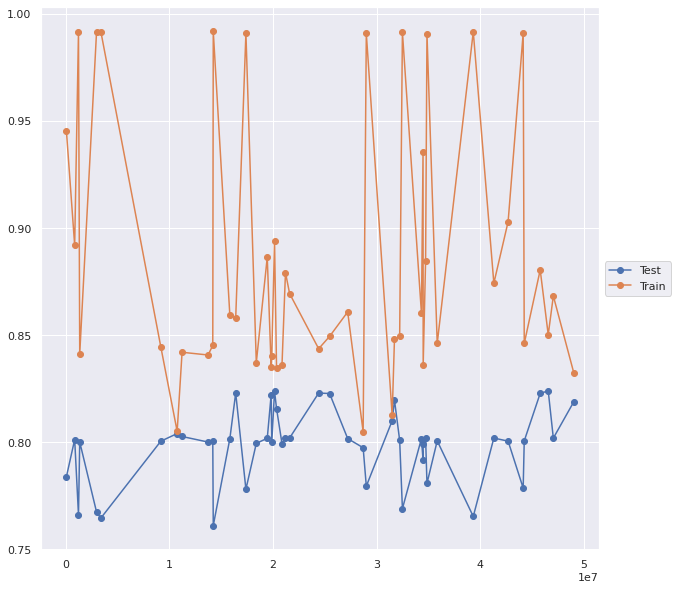

In [56]:
tfidf_max_features = np.sort(mnb_model_params.model__tfidf_max_features)
pyplot.plot(tfidf_max_features, mnb_model_params.mean_test_score, '-o', label='Test')
pyplot.plot(tfidf_max_features, mnb_model_params.mean_train_score, '-o', label='Train')
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [57]:
mnb_model_params=mnb_model_params.loc[mnb_model_params['mean_train_score']<0.83]

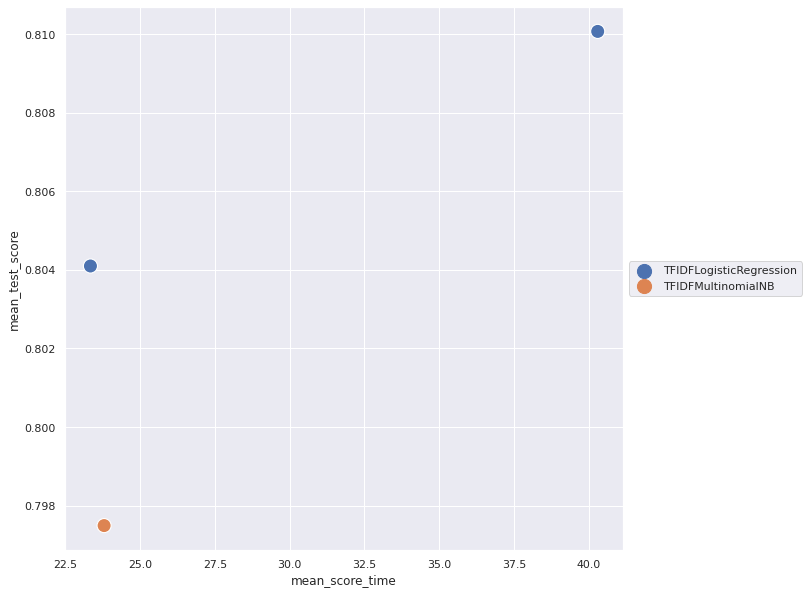

In [58]:
sns.set(rc={"figure.figsize":(10, 10)})

graph = sns.scatterplot(
    x=mnb_model_params.mean_score_time,
    y=mnb_model_params.mean_test_score,
    size=mnb_model_params.model,
    sizes=(200,200),
    hue=mnb_model_params.model,
)

graph.legend(loc='center left', bbox_to_anchor=(1, 0.5))

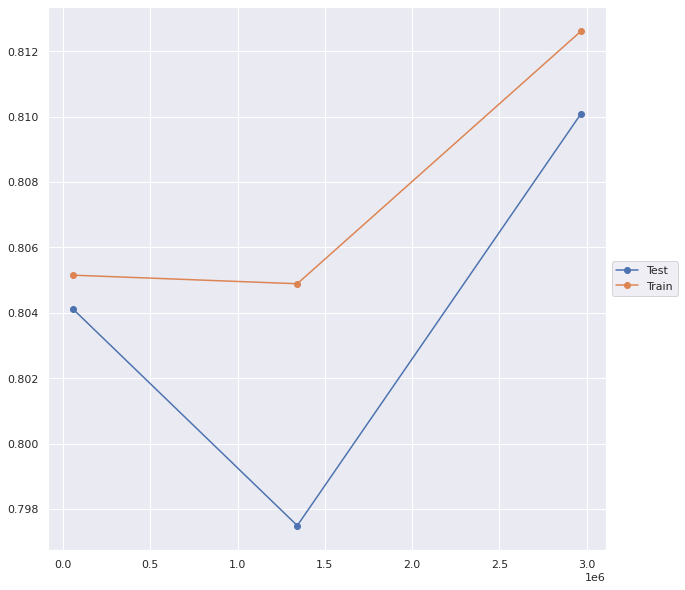

In [59]:
tfidf_max_features = np.sort(mnb_model_params.model__tfidf_max_features)
pyplot.plot(tfidf_max_features, mnb_model_params.mean_test_score, '-o', label='Test')
pyplot.plot(tfidf_max_features, mnb_model_params.mean_train_score, '-o', label='Train')
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [60]:
mnb_model_params = load_configs(json_file="second_screening_results.json", interested_model="TFIDFMultinomialNB")
mnb_model_params=mnb_model_params.loc[mnb_model_params['mean_train_score']<0.83]

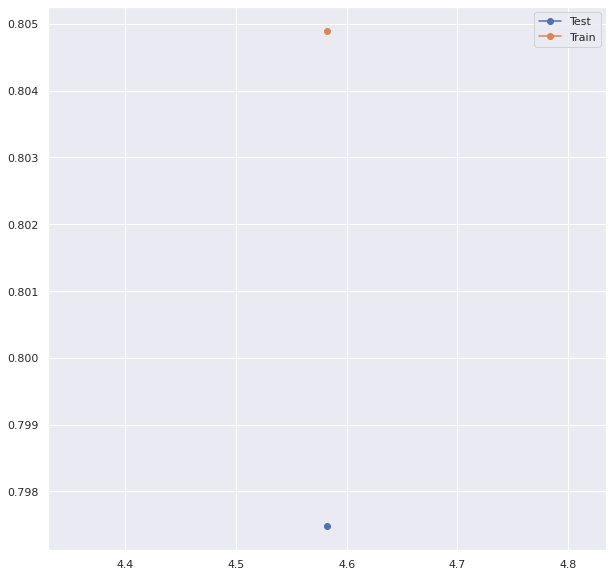

In [61]:
alpha = np.sort(mnb_model_params.model__alpha)
pyplot.plot(alpha, mnb_model_params.mean_test_score, '-o', label='Test')
pyplot.plot(alpha, mnb_model_params.mean_train_score, '-o', label='Train')
pyplot.legend()

In [62]:
mnb_model_params = load_configs(json_file="second_screening_results.json", interested_model="TFIDFLogisticRegression")
mnb_model_params=mnb_model_params.loc[mnb_model_params['mean_train_score']<0.83]

/tmp/ipykernel_5535/3855209397.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pyplot.show()


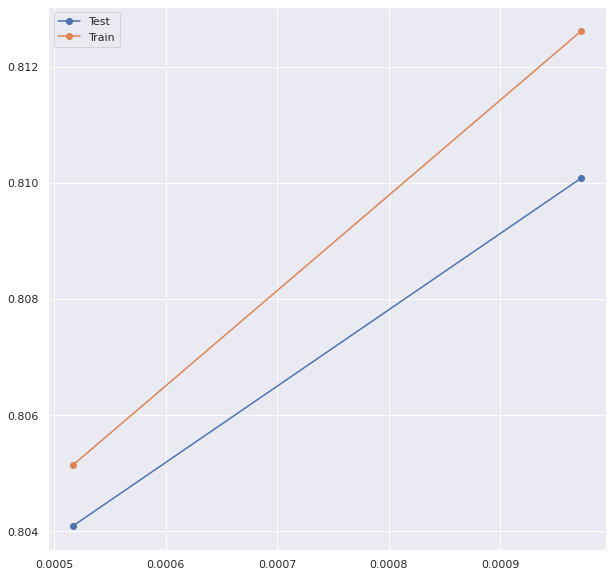

In [63]:
tol = np.sort(mnb_model_params.model__tol)
pyplot.plot(tol, mnb_model_params.mean_test_score, '-o', label='Test')
pyplot.plot(tol, mnb_model_params.mean_train_score, '-o', label='Train')
pyplot.legend()

/tmp/ipykernel_5535/669282885.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pyplot.show()


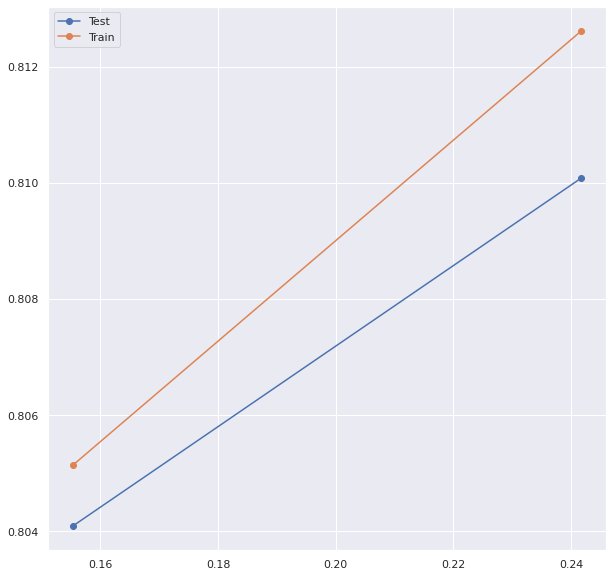

In [65]:
C = np.sort(mnb_model_params.model__C)
pyplot.plot(C, mnb_model_params.mean_test_score, '-o', label='Test')
pyplot.plot(C, mnb_model_params.mean_train_score, '-o', label='Train')
pyplot.legend()

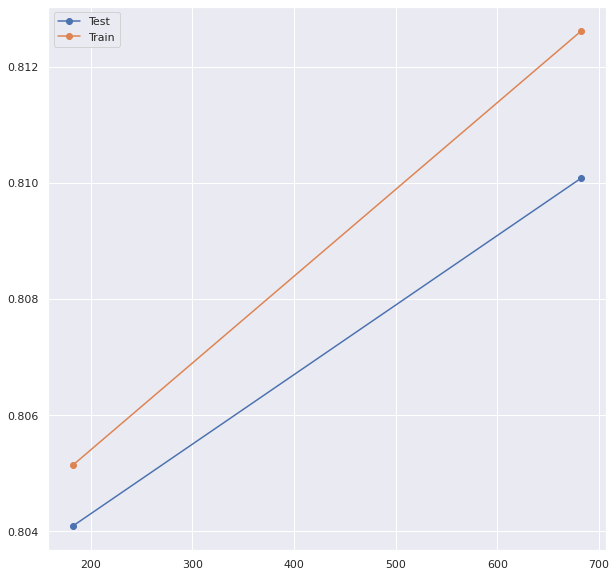

In [12]:
max_iter = np.sort(mnb_model_params.model__max_iter)

pyplot.plot(max_iter, mnb_model_params.mean_test_score, '-o', label='Test')
pyplot.plot(max_iter, mnb_model_params.mean_train_score, '-o', label='Train')
pyplot.legend()
pyplot.show()

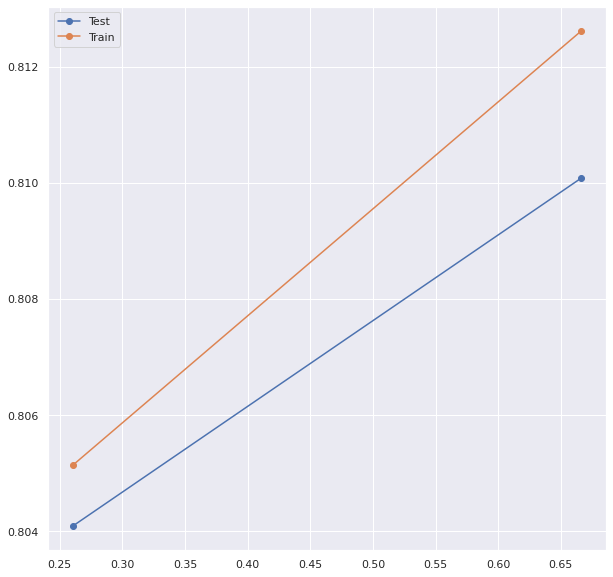

In [13]:
l1_ratio = np.sort(mnb_model_params.model__l1_ratio)

pyplot.plot(l1_ratio, mnb_model_params.mean_test_score, '-o', label='Test')
pyplot.plot(l1_ratio, mnb_model_params.mean_train_score, '-o', label='Train')
pyplot.legend()
pyplot.show()

In [34]:
mnb_model_params = load_configs(json_file="second_screening_results.json", interested_model="TFIDFMultinomialNB")

#model_params[["Mean_score_time", "mean_test_score"]] = df.query("Model == 'MultinomialNB' and embedding == 'TFIDF'").reset_index()[["Mean_score_time", "mean_test_score"]]
ProfileReport(mnb_model_params)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

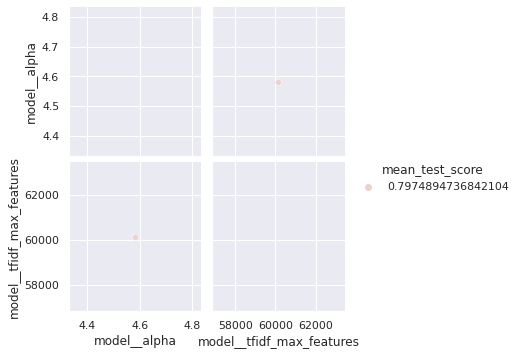

In [49]:
sns.pairplot(mnb_model_params, hue='mean_test_score', diag_kind='auto',vars=['model__alpha', 'model__tfidf_max_features'])

In [50]:
lr_model_params = load_configs(json_file="second_screening_results.json", interested_model="TFIDFLogisticRegression")
ProfileReport(lr_model_params)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

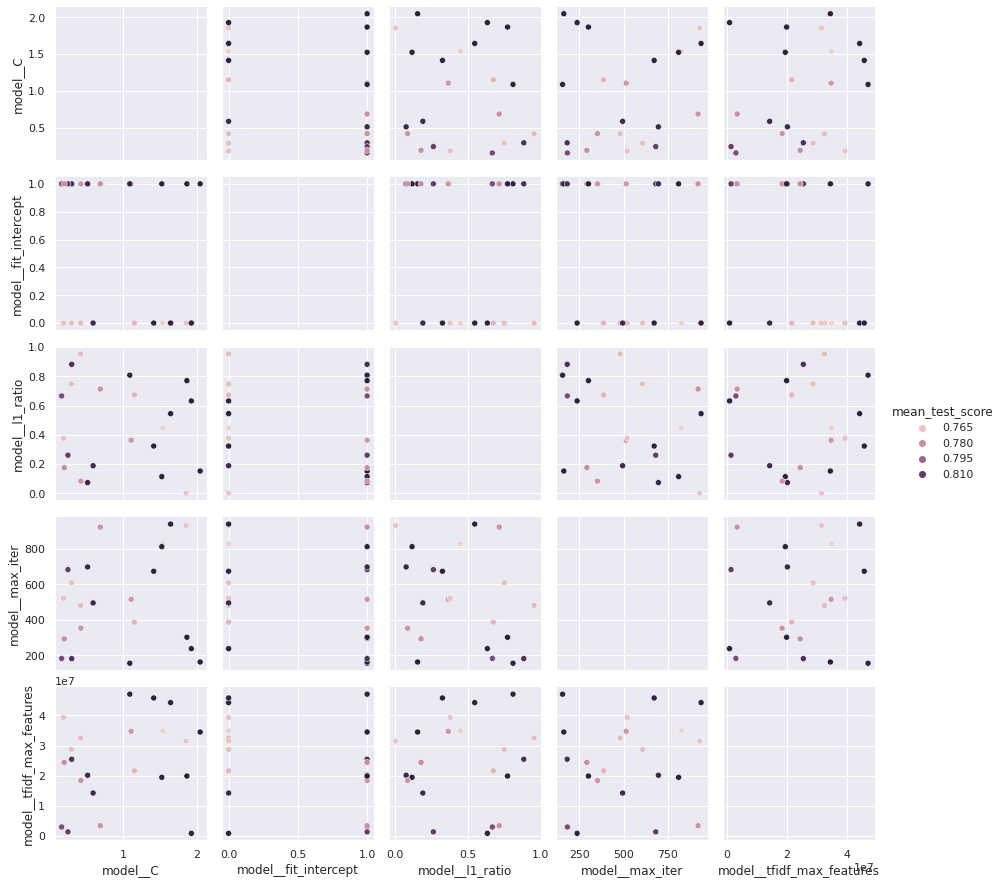

In [51]:
sns.pairplot(lr_model_params, hue='mean_test_score', diag_kind='auto',vars=['model__C', 'model__fit_intercept', 'model__l1_ratio', 'model__max_iter', 'model__tfidf_max_features'])